# Laboratory practice 2.2: KNN classification

Here we will implement our first ML model based on the _very_ popular KNN algorithm. We will use the preprocessed data from the previous practice, `SimData.dat`. The data should be properly cleaned already, and we should have available the two resulting files `train.dat` and `test.dat` with the training and testing data, respectively. Therefore, we will not need to do the preprocessing here, which is why we will (almost) jump to implementing KNN and applying it to the data.

In [2]:
# Load the modules you'll need later

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

# Data management libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Add Lab_2_2_kNN.py to the path
import sys
sys.path.append('../src')

import Lab_2_2_kNN
# Import the functions from the solution


## 1. Prepare the Dataset

This part of the process you already did in the previous practice! You can reuse everything here. Moreover, if you saved the train/test split into `train.dat` and `test.dat`, you can use them here!

In [14]:
# Load the train and test data you generated (use the name "train_df" and "test_df")
train_df = pd.read_csv("../data/train.dat", sep="\t")
test_df = pd.read_csv("../data/test.dat", sep="\t")

# Convert output variable to factor

In [15]:
# Define input and output variables, and store X_train, X_test, y_train and y_test matrices
input_vars = ['X1','X2']
target_var = 'Y'

X_train = train_df[input_vars]
y_train = train_df[target_var]
X_test = test_df[input_vars]
y_test = test_df[target_var]

## 2. Training of Machine Learning models

#### Minkowski Distance

<center>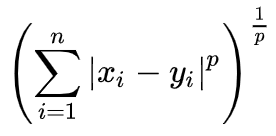</center>

#### k-Nearest Neighbors Model

- [K-Nearest Neighbours](https://scikit-learn.org/stable/modules/neighbors.html#classification)
- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [16]:
# Inputs of the model. Change accordingly to perform feature selection
INPUTS_KNN = input_vars

# Define hyperparameters of the model
k = 31 # Number of nearest neighbors
p = 2 # Order of Minkowski distance (what distance is this?)

# Create a model object
knn_fit = Lab_2_2_kNN.knn()
print(knn_fit)

kNN model (k=None, p=None)


In [17]:
# Train model
knn_fit.fit(X_train[INPUTS_KNN].values, y_train.values, k=k, p=p)
print("kNN Trained")
print(knn_fit)

kNN Trained
kNN model (k=31, p=2)


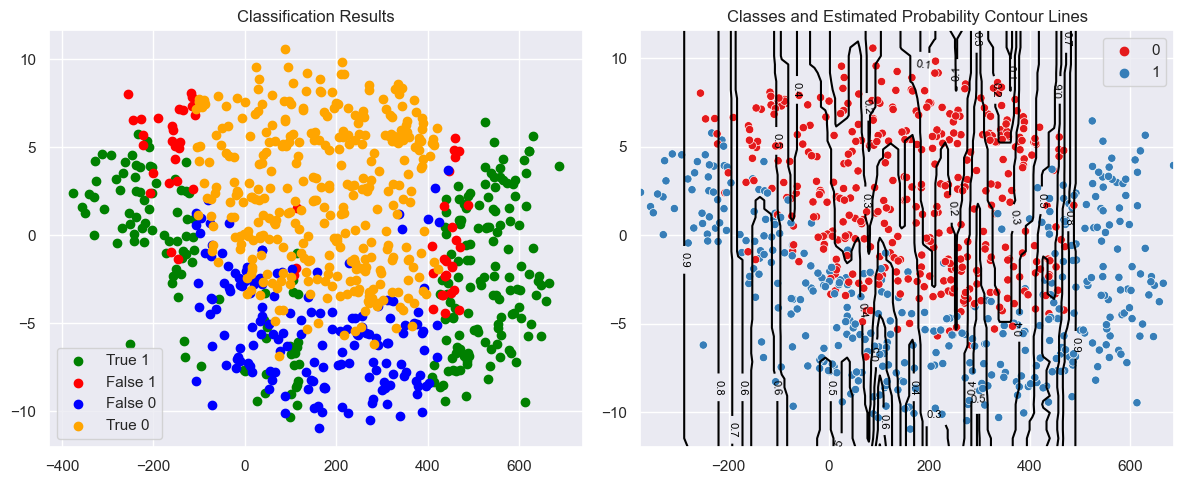

In [32]:
model_predictions = Lab_2_2_kNN.plot_2Dmodel_predictions(X_train[INPUTS_KNN].values, y_train.values, knn_fit, 50)

In [19]:
# Obtain train performance metrics
Lab_2_2_kNN.evaluate_classification_metrics(y_train, knn_fit.predict(X_train[INPUTS_KNN].values), 1)

{'Confusion Matrix': [346, 55, 162, 233],
 'Accuracy': 0.7273869346733668,
 'Precision': 0.8090277777777778,
 'Recall': 0.589873417721519,
 'Specificity': 0.8628428927680798,
 'F1 Score': 0.6822840409956077}

In [20]:
# Obtain test performance metrics
Lab_2_2_kNN.evaluate_classification_metrics(y_test, knn_fit.predict(X_test[INPUTS_KNN].values),  1)

{'Confusion Matrix': [86, 10, 55, 49],
 'Accuracy': 0.675,
 'Precision': 0.8305084745762712,
 'Recall': 0.47115384615384615,
 'Specificity': 0.8958333333333334,
 'F1 Score': 0.6012269938650305}

In [21]:
probs = knn_fit.predict_proba(X_train.values)

In [25]:

def plot_calibration_curve(y_true, y_probs, positive_label, n_bins=10):
    """
    Plot a calibration curve to evaluate the accuracy of predicted probabilities.

    This function creates a plot that compares the mean predicted probabilities
    in each bin with the fraction of positives (true outcomes) in that bin.
    This helps assess how well the probabilities are calibrated.

    Args:
        y_true (array-like): True labels of the data. Can be binary or categorical.
        y_probs (array-like): Predicted probabilities for the positive class (positive_label).
                            Expected values are in the range [0, 1].
        positive_label (int or str): The label that is considered the positive class.
                                    This is used to map categorical labels to binary outcomes.
        n_bins (int, optional): Number of bins to use for grouping predicted probabilities.
                                Defaults to 10. Bins are equally spaced in the range [0, 1].

    Returns:
        dict: A dictionary with the following keys:
            - "bin_centers": Array of the center values of each bin.
            - "true_proportions": Array of the fraction of positives in each bin

    """
    # Map string labels to 0 or 1
    y_true_mapped = np.array([1 if label == positive_label else 0 for label in y_true])

    # Bin the predicted probabilities
    bins = np.linspace(0, 1, n_bins + 1)
    bin_indices = np.digitize(y_probs, bins) - 1

    # Calculate the mean predicted probability and true proportion in each bin
    bin_centers = (bins[:-1] + bins[1:]) / 2
    true_proportions = np.array([
        np.mean(y_true_mapped[bin_indices == i]) if np.any(bin_indices == i) else 0
        for i in range(n_bins)
    ])
    mean_predicted_probs = np.array([
        np.mean(y_probs[bin_indices == i]) if np.any(bin_indices == i) else 0
        for i in range(n_bins)
    ])

    # Plot the calibration curve
    plt.figure(figsize=(8, 6))
    plt.plot(mean_predicted_probs, true_proportions, marker='o', linestyle='-', label='Calibration curve')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
    plt.xlabel('Mean predicted probability')
    plt.ylabel('Fraction of positives')
    plt.title('Calibration Curve')
    plt.legend()
    plt.show()

    return {"bin_centers": bin_centers, "true_proportions": true_proportions}



def plot_probability_histograms(y_true, y_probs, positive_label, n_bins=10):
    """
    Plot probability histograms for the positive and negative classes separately.

    This function creates two histograms showing the distribution of predicted
    probabilities for each class. This helps in understanding how the model
    differentiates between the classes.

    Args:
        y_true (array-like): True labels of the data. Can be binary or categorical.
        y_probs (array-like): Predicted probabilities for the positive class. 
                            Expected values are in the range [0, 1].
        positive_label (int or str): The label considered as the positive class.
                                    Used to map categorical labels to binary outcomes.
        n_bins (int, optional): Number of bins for the histograms. Defaults to 10. 
                                Bins are equally spaced in the range [0, 1].

    Returns:
        dict: A dictionary with the following keys:
            - "array_passed_to_histogram_of_positive_class": 
                Array of predicted probabilities for the positive class.
            - "array_passed_to_histogram_of_negative_class": 
                Array of predicted probabilities for the negative class.

    """
    y_true_mapped = np.array([1 if label == positive_label else 0 for label in y_true])


    # Plot histograms
    plt.figure(figsize=(12, 6))
    plt.hist(y_probs[y_true_mapped == 1], bins=n_bins, alpha=0.6, color='blue', label='Positive class')
    plt.hist(y_probs[y_true_mapped == 0], bins=n_bins, alpha=0.6, color='red', label='Negative class')
    plt.xlabel('Predicted probability')
    plt.ylabel('Frequency')
    plt.title('Probability Histograms')
    plt.legend()
    plt.show()

    return {
        "array_passed_to_histogram_of_positive_class": y_probs[y_true_mapped == 1],
        "array_passed_to_histogram_of_negative_class": y_probs[y_true_mapped == 0],
    }

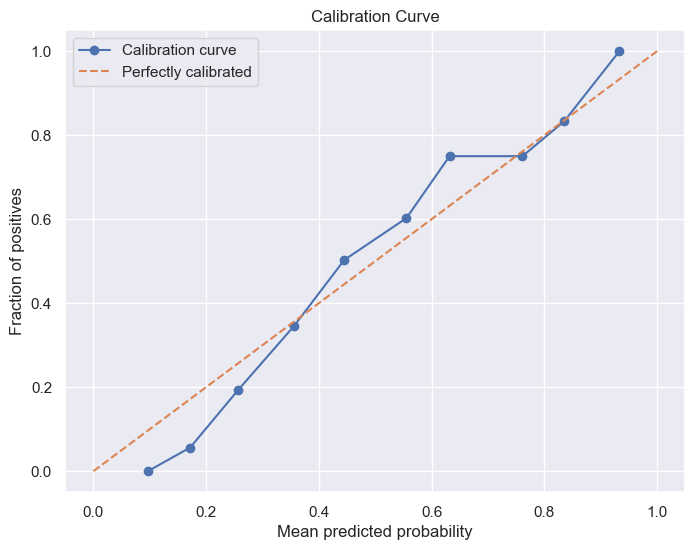

In [26]:
calibration_curve = plot_calibration_curve(y_train.values, probs[:,1], 1)

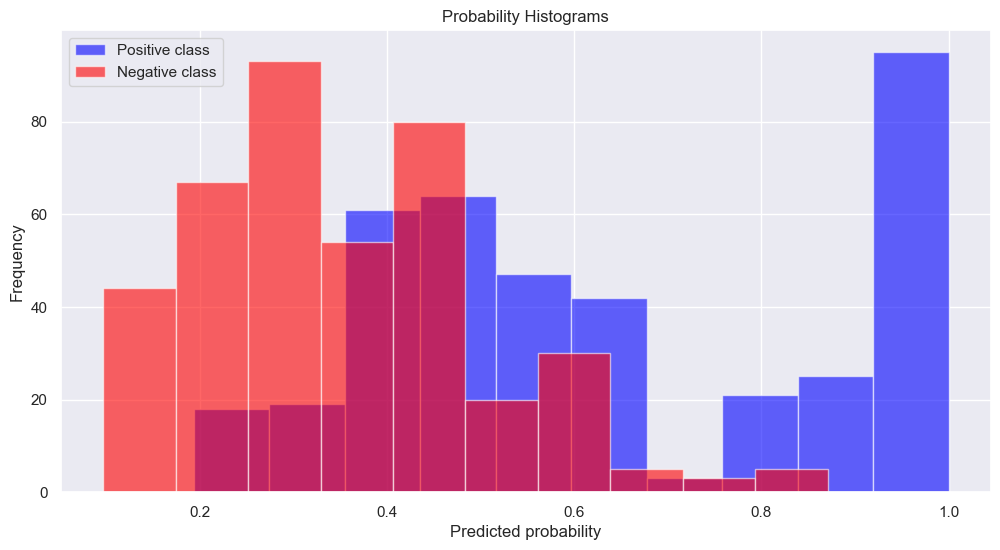

In [27]:
probability_histograms = plot_probability_histograms(y_train.values, probs[:,1], 1)

In [33]:


def plot_roc_curve(y_true, y_probs, positive_label):
    """
    Plot the Receiver Operating Characteristic (ROC) curve.

    The ROC curve is a graphical representation of the diagnostic ability of a binary
    classifier system as its discrimination threshold is varied. It plots the True Positive
    Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

    Args:
        y_true (array-like): True labels of the data. Can be binary or categorical.
        y_probs (array-like): Predicted probabilities for the positive class. 
                            Expected values are in the range [0, 1].
        positive_label (int or str): The label considered as the positive class.
                                    Used to map categorical labels to binary outcomes.

    Returns:
        dict: A dictionary containing the following:
            - "fpr": Array of False Positive Rates for each threshold.
            - "tpr": Array of True Positive Rates for each threshold.

    """
    y_true_mapped = np.array([1 if label == positive_label else 0 for label in y_true])
    y_probs = np.array(y_probs)
    np.append(y_probs,0)
    np.append(y_probs,1)
    # Get unique thresholds (sorted in descending order)
    thresholds = np.linspace(0, 1, 11)

    tpr = []
    fpr = []

    # Compute TPR and FPR for each threshold
    for threshold in thresholds:
        y_pred = (y_probs >= threshold).astype(int)  # Convert probabilities to binary predictions

        tp = np.sum((y_pred == 1) & (y_true_mapped == 1))  # True Positives
        fn = np.sum((y_pred == 0) & (y_true_mapped == 1))  # False Negatives
        fp = np.sum((y_pred == 1) & (y_true_mapped == 0))  # False Positives
        tn = np.sum((y_pred == 0) & (y_true_mapped == 0))  # True Negatives

        tpr.append(tp / (tp + fn) if (tp + fn) > 0 else 0)  # TPR = TP / (TP + FN)
        fpr.append(fp / (fp + tn) if (fp + tn) > 0 else 0)  # FPR = FP / (FP + TN)


    # Plot ROC Curve
    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, marker="o", linestyle="-", label="ROC Curve", color="blue")  # FIXED
    plt.plot([0, 1], [0, 1], "--", color="gray", label="Random Classifier (Baseline)")
    
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.grid(True)
    plt.show()
    return {"fpr": np.array(fpr), "tpr": np.array(tpr)}

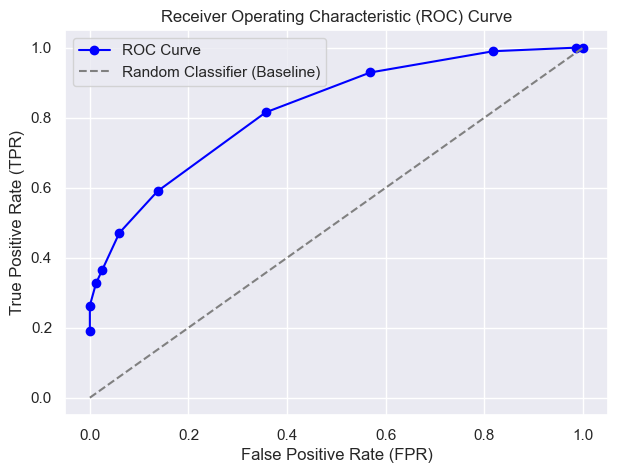

In [34]:
roc_curve = plot_roc_curve(y_train.values, probs[:,1], 1)